# WB2 - Data Visualisations

## Table of Contents

* [1. Import Libraries and Data](#Import)
* [2. Overview of Onelivery's Current Operations](#Operations)
    * [Overview visualisations of Onelivery’s operations](#Overview)
    * [Visualisations of Onelivery’s efficiency](#Efficiency)
    * [Visualisations of Onelivery’s financial performance](#Finance)
* [3. Summary Statistics](#Summary)
    * [Histograms](#Histograms)
    * [Correlations](#Correlations)
* [4. Target Variable and Relationship Analysis](#Target_and_Relationship)
    * [Target Variable Distribution](#Target)
    * [Numeric Input Variables and Target Variable Relationship Analysis](#Numeric)
    * [Categorical Input Variables and Target Variable Relationship Analysis](#Categorical)
* [Processing Times](#Processing)

# 1. Import Libraries and Data<a class="anchor" id="Import"></a>

We start by importing the necessary Python libraries: numpy, pandas, datetime, matplotlib.pyplot, seaborn, scipy.stats, and matplotlib.gridspec. These libraries will help us perform data manipulation, visualization, and statistical analysis. We also load the cleaned dataset from the CSV file called 'cleaned_data.csv' into a DataFrame named df.

In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress
from matplotlib.gridspec import GridSpec

In [2]:
# Load the data from the CSV file
df = pd.read_csv('cleaned_data.csv')

# Show the first 5 rows of the DataFrame to confirm it was loaded correctly
df.head()

,orderID,businessType,dateOnly,timeOnly,business_vs_Customer,numberOfPackages,estimatedDistance,timeInTransitInMinutes,totalOrderDurationInMinutes,confirmationTimeInMinutes,...,numberOfDropoffs,grandTotalAmount(£),co2SavedInKG,volume_category,Region,year,month,day,timeOfDay,Season
0,1627,Pharmacy,2021-11-01,16:49:38,business,1,3.0,15,119,75,...,1,8.09,0.684,Small,Kensington and Chelsea,2021,11,1,Afternoon,Autumn
1,1629,Pharmacy,2021-11-02,12:59:35,business,1,3.0,14,58,2,...,1,12.12,0.684,Small,Kensington and Chelsea,2021,11,2,Afternoon,Autumn
2,1630,Pharmacy,2021-11-02,14:10:49,business,1,3.9,33,106,1,...,1,9.59,0.889,Small,Hammersmith and Fulham,2021,11,2,Afternoon,Autumn
3,1631,Pharmacy,2021-11-02,17:03:41,business,1,3.0,17,51,10,...,1,12.12,0.684,Small,Kensington and Chelsea,2021,11,2,Afternoon,Autumn
4,1632,Pharmacy,2021-11-02,17:20:03,business,1,2.1,28,64,0,...,1,6.59,0.479,Small,Kensington and Chelsea,2021,11,2,Afternoon,Autumn


In [3]:
df.shape

(2201, 26)

In [4]:
df.columns

Index(['orderID', 'businessType', 'dateOnly', 'timeOnly',
       'business_vs_Customer', 'numberOfPackages', 'estimatedDistance',
       'timeInTransitInMinutes', 'totalOrderDurationInMinutes',
       'confirmationTimeInMinutes', 'timeConfirmationToPickupInMinutes',
       'collectionDurationInMinutes', 'vehicleEfficiency', 'isExpressDelivery',
       'isMultidropCourierOrder', 'numberOfReturns', 'numberOfDropoffs',
       'grandTotalAmount(£)', 'co2SavedInKG', 'volume_category', 'Region',
       'year', 'month', 'day', 'timeOfDay', 'Season'],
      dtype='object')

# 2. Overview of Onelivery's Current Operations<a class="anchor" id="Operations"></a>

## Overview visualisations of Onelivery’s operations<a class="anchor" id="Overview"></a>

Let's explore an overview of Onelivery's operations. Analyzing order counts over time helps us identify growth patterns, seasonal trends, and fluctuations. Understanding the distribution of orders across business types guides strategic decisions, resource allocation, and focus areas. Analyzing orders by region enables optimized resource allocation and marketing strategies. Recognizing monthly order patterns allows preparation for peak demand and adjustments during slower periods.

We group the data by year and month and calculate the count of orders for each month to visualize the trend of order counts over time. We use the groupby method on the DataFrame to achieve this. We count the number of orders for each business type to understand the distribution of orders across different business categories. We count the number of orders for each region to visualize the distribution of orders across different regions. We group the data by month and calculate the count of orders for each month to understand the monthly order patterns. We create a 2x2 grid layout for the dashboard visualizations. The first plot (ax1) shows the trend of order counts over time using a line graph. The second plot (ax2) displays the number of orders per month using a bar chart. The third plot (ax3) visualizes the number of orders per region using a horizontal bar chart. The fourth plot (ax4) presents the distribution of orders by business type using a pie chart.

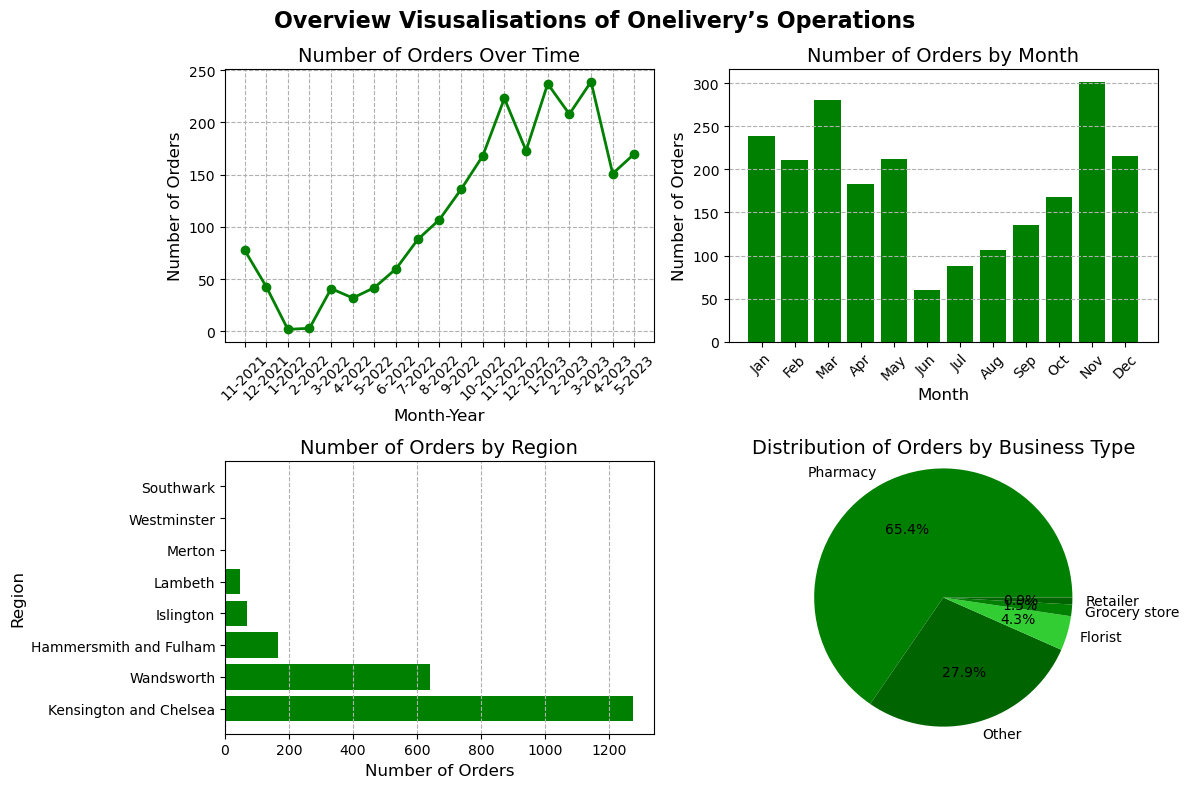

In [5]:
# Prepare the data for the count of orders over time
grouped_orders = df.groupby(['year', 'month'])['orderID'].count()
years = [str(year) for year, _ in grouped_orders.index]
months = [str(month) for _, month in grouped_orders.index]
labels = [f'{month}-{year}' for year, month in zip(years, months)]

# Prepare the data for the distribution of orders by business type
grouped_business = df['businessType'].value_counts()

# Prepare the data for the number of orders by region
grouped_region = df['Region'].value_counts()

# Prepare the data for the number of orders by month
grouped_month = df.groupby('month')['orderID'].count()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
labels_month = [month for month in months]

# Create a 2x2 grid for the dashboard layout
fig = plt.figure(figsize=(12, 8))
grid = GridSpec(2, 2, figure=fig)

# Plot for count of orders over time
ax1 = fig.add_subplot(grid[0, 0])
ax1.plot(labels, grouped_orders.values, color='green', marker='o', linewidth=2)
ax1.set_xlabel('Month-Year', fontsize=12)
ax1.set_ylabel('Number of Orders', fontsize=12)
ax1.set_title('Number of Orders Over Time', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.grid(axis='x', linestyle='--')
ax1.grid(axis='y', linestyle='--')


# Plot for number of orders by month
ax2 = fig.add_subplot(grid[0, 1])
ax2.bar(labels_month, grouped_month.values, color='green')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Number of Orders', fontsize=12)
ax2.set_title('Number of Orders by Month', fontsize=14)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax2.grid(axis='y', linestyle='--')

# Plot for number of orders by region
ax3 = fig.add_subplot(grid[1, 0])
ax3.barh(grouped_region.index, grouped_region.values, color='green')
ax3.set_xlabel('Number of Orders', fontsize=12)
ax3.set_ylabel('Region', fontsize=12)
ax3.set_title('Number of Orders by Region', fontsize=14)
ax3.tick_params(axis='both', labelsize=10)
ax3.grid(axis='x', linestyle='--')

# Plot for distribution of orders by business type
ax4 = fig.add_subplot(grid[1, 1])
ax4.pie(grouped_business, labels=grouped_business.index, colors=['green', 'darkgreen', 'limegreen'], autopct='%1.1f%%')
ax4.set_title('Distribution of Orders by Business Type', fontsize=14)
ax4.axis('equal')  # Ensure pie is drawn as a circle

# Add a title to the figure
fig.suptitle("Overview Visusalisations of Onelivery’s Operations", fontsize=16, fontweight='bold')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the dashboard
plt.show()

## Visualisations of Onelivery’s efficiency<a class="anchor" id="Efficiency"></a>

Next, the vehicleEfficiency variable is used to quantify the company’s delivery efficiency compared to benchmarks based on certain speed and distance parameters. A value below 1 indicates that the order was completed faster than anticipated, while a value of 1 suggests it was completed as expected. Meanwhile, a value above 1 indicates that the order took longer than expected. 

Analyzing vehicle efficiency by region reveals transportation performance, aiding in route optimization, resource allocation, cost reduction, and environmental impact. Understanding efficiency variations with distance informs vehicle selection, maintenance, and fuel consumption decisions. Analyzing process duration breakdown identifies potential bottlenecks for streamlined operations and improved customer satisfaction. Investigating the packages-vehicle efficiency relationship optimizes delivery strategies for different package sizes.

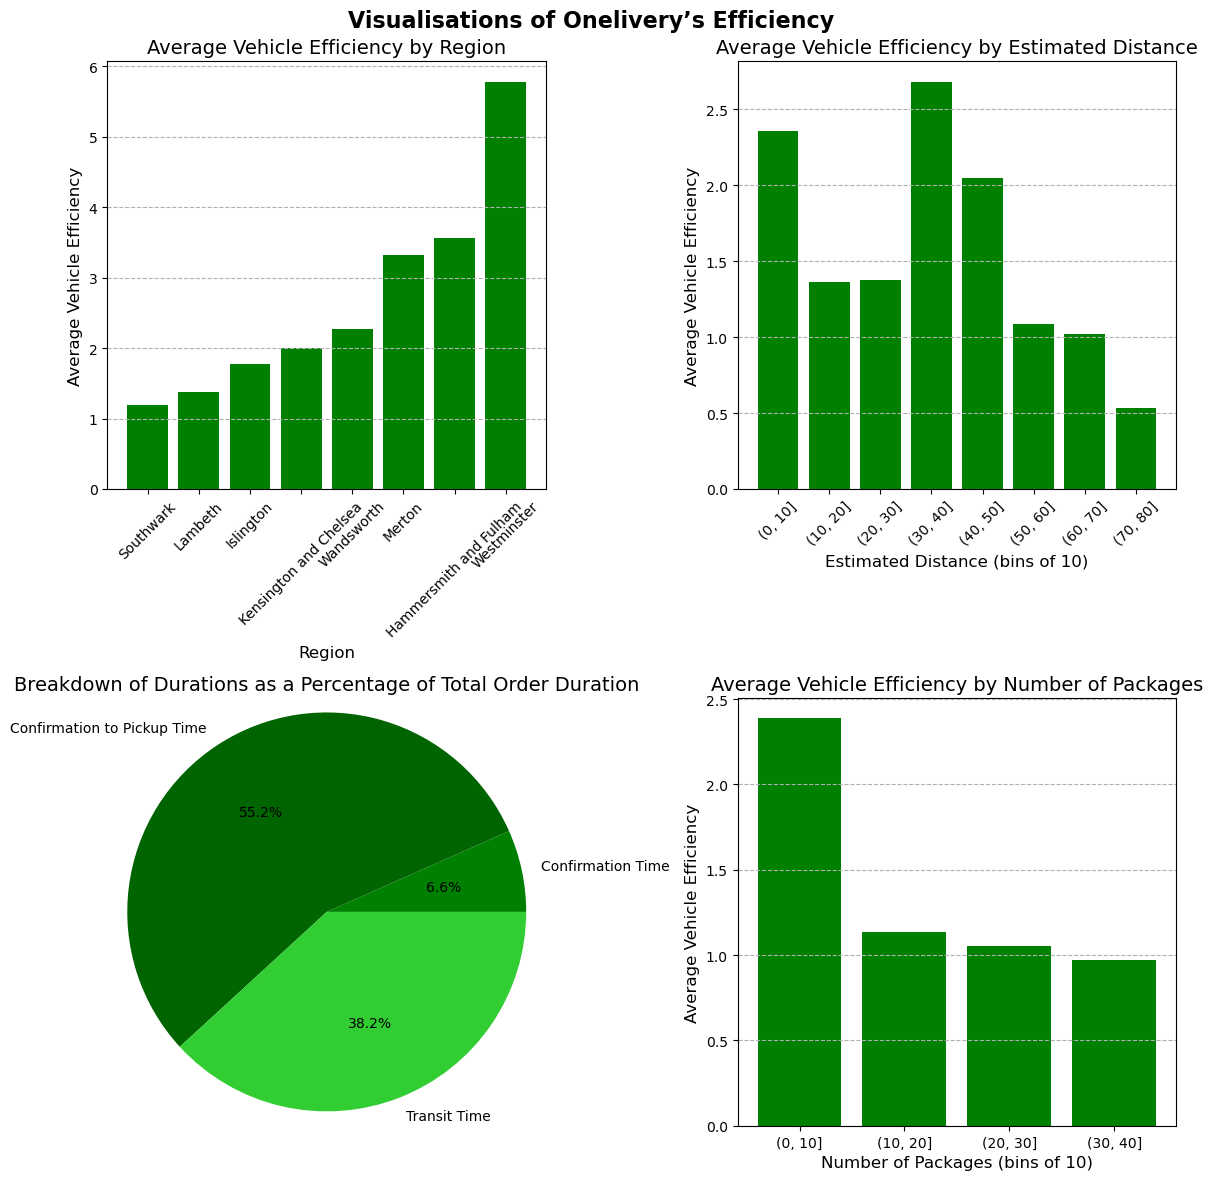

In [6]:
# Group the estimated distance into bins of 10
distance_bins = pd.cut(df['estimatedDistance'], bins=range(0, int(df['estimatedDistance'].max()) + 11, 10))

# Prepare the data for average vehicle efficiency by region
grouped_region = df.groupby('Region')['vehicleEfficiency'].mean().sort_values()

# Prepare the data for average vehicle efficiency by estimated distance bin
grouped_distance = df.groupby(distance_bins)['vehicleEfficiency'].mean()

# Prepare the data for the breakdown of durations as a percentage of total order duration
labels_breakdown = ['Confirmation Time', 'Confirmation to Pickup Time', 'Transit Time']
percentage_breakdown = [
    df['confirmationTimeInMinutes'].mean() / df['totalOrderDurationInMinutes'].mean() * 100,
    df['timeConfirmationToPickupInMinutes'].mean() / df['totalOrderDurationInMinutes'].mean() * 100,
    df['timeInTransitInMinutes'].mean() / df['totalOrderDurationInMinutes'].mean() * 100
]

# Group the number of packages into bins of 10
packages_bins = pd.cut(df['numberOfPackages'], bins=range(0, int(df['numberOfPackages'].max()) + 11, 10))

# Prepare the data for average vehicle efficiency by grouped number of packages
grouped_packages = df.groupby(packages_bins)['vehicleEfficiency'].mean()

# Create a 2x2 grid for the dashboard layout
fig = plt.figure(figsize=(12, 12))
grid = GridSpec(2, 2, figure=fig)

# Plot for average vehicle efficiency by region
ax1 = fig.add_subplot(grid[0, 0])
ax1.bar(grouped_region.index, grouped_region.values, color='green')
ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Average Vehicle Efficiency', fontsize=12)
ax1.set_title('Average Vehicle Efficiency by Region', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.grid(axis='y', linestyle='--')

# Plot for average vehicle efficiency by estimated distance bin
ax2 = fig.add_subplot(grid[0, 1])
ax2.bar(grouped_distance.index.astype(str), grouped_distance.values, color='green')
ax2.set_xlabel('Estimated Distance (bins of 10)', fontsize=12)
ax2.set_ylabel('Average Vehicle Efficiency', fontsize=12)
ax2.set_title('Average Vehicle Efficiency by Estimated Distance', fontsize=14)
ax2.tick_params(axis='x', labelsize=10, rotation=45)
ax2.tick_params(axis='y', labelsize=10)
ax2.grid(axis='y', linestyle='--')

# Plot for the breakdown of durations as a percentage of total order duration
ax3 = fig.add_subplot(grid[1, 0])
ax3.pie(percentage_breakdown, labels=labels_breakdown, colors=['green', 'darkgreen', 'limegreen'], autopct='%1.1f%%')
ax3.set_title('Breakdown of Durations as a Percentage of Total Order Duration', fontsize=14)
ax3.axis('equal')

# Plot for average vehicle efficiency by grouped number of packages
ax4 = fig.add_subplot(grid[1, 1])
ax4.bar(grouped_packages.index.astype(str), grouped_packages.values, color='green')
ax4.set_xlabel('Number of Packages (bins of 10)', fontsize=12)
ax4.set_ylabel('Average Vehicle Efficiency', fontsize=12)
ax4.set_title('Average Vehicle Efficiency by Number of Packages', fontsize=14)
ax4.tick_params(axis='x', labelsize=10)
ax4.tick_params(axis='y', labelsize=10)
ax4.grid(axis='y', linestyle='--')

# Add a figure title
fig.suptitle("Visualisations of Onelivery’s Efficiency", fontsize=16, fontweight='bold')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the dashboard
plt.show()

In [7]:
# Calculate the total number of orders
total_orders = df['vehicleEfficiency'].count()

# Count the number of orders per estimated distance bin
orders_per_distance_bin = df.groupby(distance_bins)['vehicleEfficiency'].count()

# Convert the counts to percentages
orders_per_distance_bin_percent = (orders_per_distance_bin / total_orders) * 100

# Print the result
print(orders_per_distance_bin_percent)

estimatedDistance
(0, 10]     79.373012
(10, 20]    12.766924
(20, 30]     4.725125
(30, 40]     1.544752
(40, 50]     0.817810
(50, 60]     0.499773
(60, 70]     0.227169
(70, 80]     0.045434
Name: vehicleEfficiency, dtype: float64


In [8]:
print(grouped_distance)

estimatedDistance
(0, 10]     2.359987
(10, 20]    1.366579
(20, 30]    1.376784
(30, 40]    2.682972
(40, 50]    2.046027
(50, 60]    1.089425
(60, 70]    1.022477
(70, 80]    0.536232
Name: vehicleEfficiency, dtype: float64


## Visualisations of Onelivery’s financial performance<a class="anchor" id="Finance"></a>

The order value (£) trends can also be investigated. Analyzing revenue trends over time provides financial insights for Onelivery. Understanding revenue distribution among business types guides resource allocation and marketing efforts. Analyzing revenue by estimated distance optimizes pricing strategies. Examining revenue by region identifies lucrative areas for expansion and targeted marketing. These visualizations offer valuable insights for data-driven decision-making, optimizing services, and achieving sustainable growth in a competitive market.

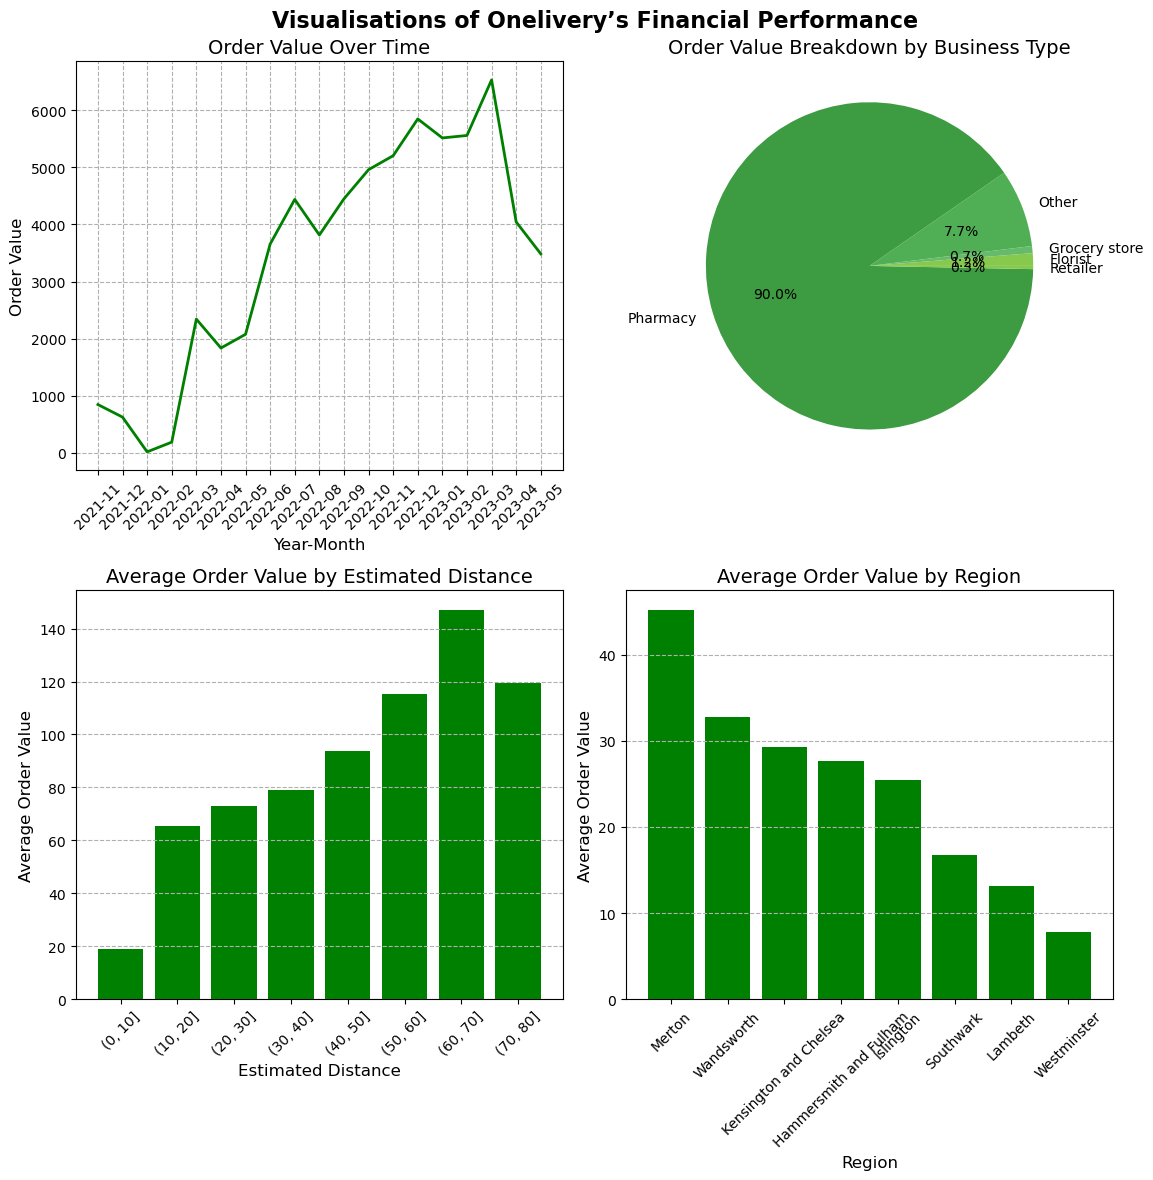

In [9]:
# Prepare the data for revenue over time
df['dateOnly'] = pd.to_datetime(df['dateOnly'])
df['YearMonth'] = df['dateOnly'].dt.to_period('M')
grouped_revenue_time = df.groupby('YearMonth')['grandTotalAmount(£)'].sum()

# Prepare the data for revenue breakdown by business type
grouped_revenue_business = df.groupby('businessType')['grandTotalAmount(£)'].sum()

# Prepare the data for average revenue grouped by distance
df['distance_bins'] = pd.cut(df['estimatedDistance'], bins=range(0, int(df['estimatedDistance'].max()) + 11, 10))
grouped_distance = df.groupby('distance_bins')['grandTotalAmount(£)'].mean()

# Prepare the data for average revenue by region
grouped_revenue_region = df.groupby('Region')['grandTotalAmount(£)'].mean()
grouped_revenue_region = grouped_revenue_region.sort_values(ascending=False)

# Create a 2x2 grid for the dashboard layout
fig = plt.figure(figsize=(12, 12))
grid = GridSpec(2, 2, figure=fig)

# Plot for revenue over time (Line graph)
ax1 = fig.add_subplot(grid[0, 0])
months = grouped_revenue_time.index.astype(str)
ax1.plot(months, grouped_revenue_time.values, color='green', linewidth=2)
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Order Value', fontsize=12)
ax1.set_title('Order Value Over Time', fontsize=14)
ax1.tick_params(axis='x', labelrotation=45, labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.grid(axis='y', linestyle='--')
ax1.grid(axis='x', linestyle='--')


# Plot for revenue breakdown by business type (Pie chart)
ax2 = fig.add_subplot(grid[0, 1])
colors = ['#86C94C', '#66BB6A', '#50AF54', '#3D9B42']
ax2.pie(grouped_revenue_business, labels=grouped_revenue_business.index, colors=colors, autopct='%1.1f%%')
ax2.set_title('Order Value Breakdown by Business Type', fontsize=14)

# Plot for average revenue grouped by distance
ax3 = fig.add_subplot(grid[1, 0])
ax3.bar(grouped_distance.index.astype(str), grouped_distance.values, color='green')
ax3.set_xlabel('Estimated Distance', fontsize=12)
ax3.set_ylabel('Average Order Value', fontsize=12)
ax3.set_title('Average Order Value by Estimated Distance', fontsize=14)
ax3.tick_params(axis='x', rotation = 45, labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax3.grid(axis='y', linestyle='--')

# Plot for average revenue by region
ax4 = fig.add_subplot(grid[1, 1])
ax4.bar(grouped_revenue_region.index, grouped_revenue_region.values, color='green')
ax4.set_xlabel('Region', fontsize=12)
ax4.set_ylabel('Average Order Value', fontsize=12)
ax4.set_title('Average Order Value by Region', fontsize=14)
ax4.tick_params(axis='x', rotation=45, labelsize=10)
ax4.tick_params(axis='y', labelsize=10)
ax4.grid(axis='y', linestyle='--')

# Add figure title
fig.suptitle("Visualisations of Onelivery’s Financial Performance", fontsize=16, fontweight='bold')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the dashboard
plt.show()

# 3. Summary Statistics<a class="anchor" id="Summary"></a>

The summary statistics provide a concise overview of the numeric variables in the dataset. These statistics include count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum. Each statistic serves as a measure to understand the central tendency, variability, and distribution of the data for each numeric variable.

In [10]:
# Display summary statistics for numeric columns
df.describe().round(decimals=2)

,orderID,numberOfPackages,estimatedDistance,timeInTransitInMinutes,totalOrderDurationInMinutes,confirmationTimeInMinutes,timeConfirmationToPickupInMinutes,collectionDurationInMinutes,vehicleEfficiency,isExpressDelivery,isMultidropCourierOrder,numberOfReturns,numberOfDropoffs,grandTotalAmount(£),co2SavedInKG,year,month,day
count,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00,2201.00
mean,3214.08,4.76,6.98,54.54,151.37,9.48,78.83,2.64,2.18,0.03,0.48,0.50,4.26,29.73,1.59,2022.40,6.33,15.14
std,855.91,5.72,9.01,50.09,84.93,18.69,63.15,7.45,3.40,0.18,0.50,1.18,4.92,33.03,2.05,0.59,3.83,8.60
min,1627.00,1.00,0.10,0.00,4.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.03,0.02,2021.00,1.00,1.00
25%,2515.00,1.00,1.80,17.00,83.00,0.00,30.00,0.00,0.94,0.00,0.00,0.00,1.00,7.79,0.41,2022.00,3.00,8.00
50%,3224.00,1.00,3.50,39.00,138.00,2.00,64.00,0.00,1.25,0.00,0.00,0.00,1.00,13.92,0.80,2022.00,5.00,15.00
75%,3944.00,7.00,8.50,80.00,212.00,9.00,114.00,3.00,1.90,0.00,1.00,0.00,6.00,41.88,1.94,2023.00,10.00,22.00
max,4661.00,36.00,72.50,313.00,360.00,191.00,333.00,150.00,55.83,1.00,1.00,10.00,30.00,480.00,16.54,2023.00,12.00,31.00


## Histograms<a class="anchor" id="Histograms"></a>

The histograms display the frequency distribution of numeric variables in the dataset. Each histogram represents the distribution of data into bins, with the height of each bar corresponding to the frequency of data points falling within that bin.
- It provides a visual representation of the data distribution, helping to identify potential patterns and outliers.
- Understanding the shape of the distribution can reveal information about data skewness, central tendency, and spread.
- Examining histograms for different variables can help identify trends or correlations between variables.

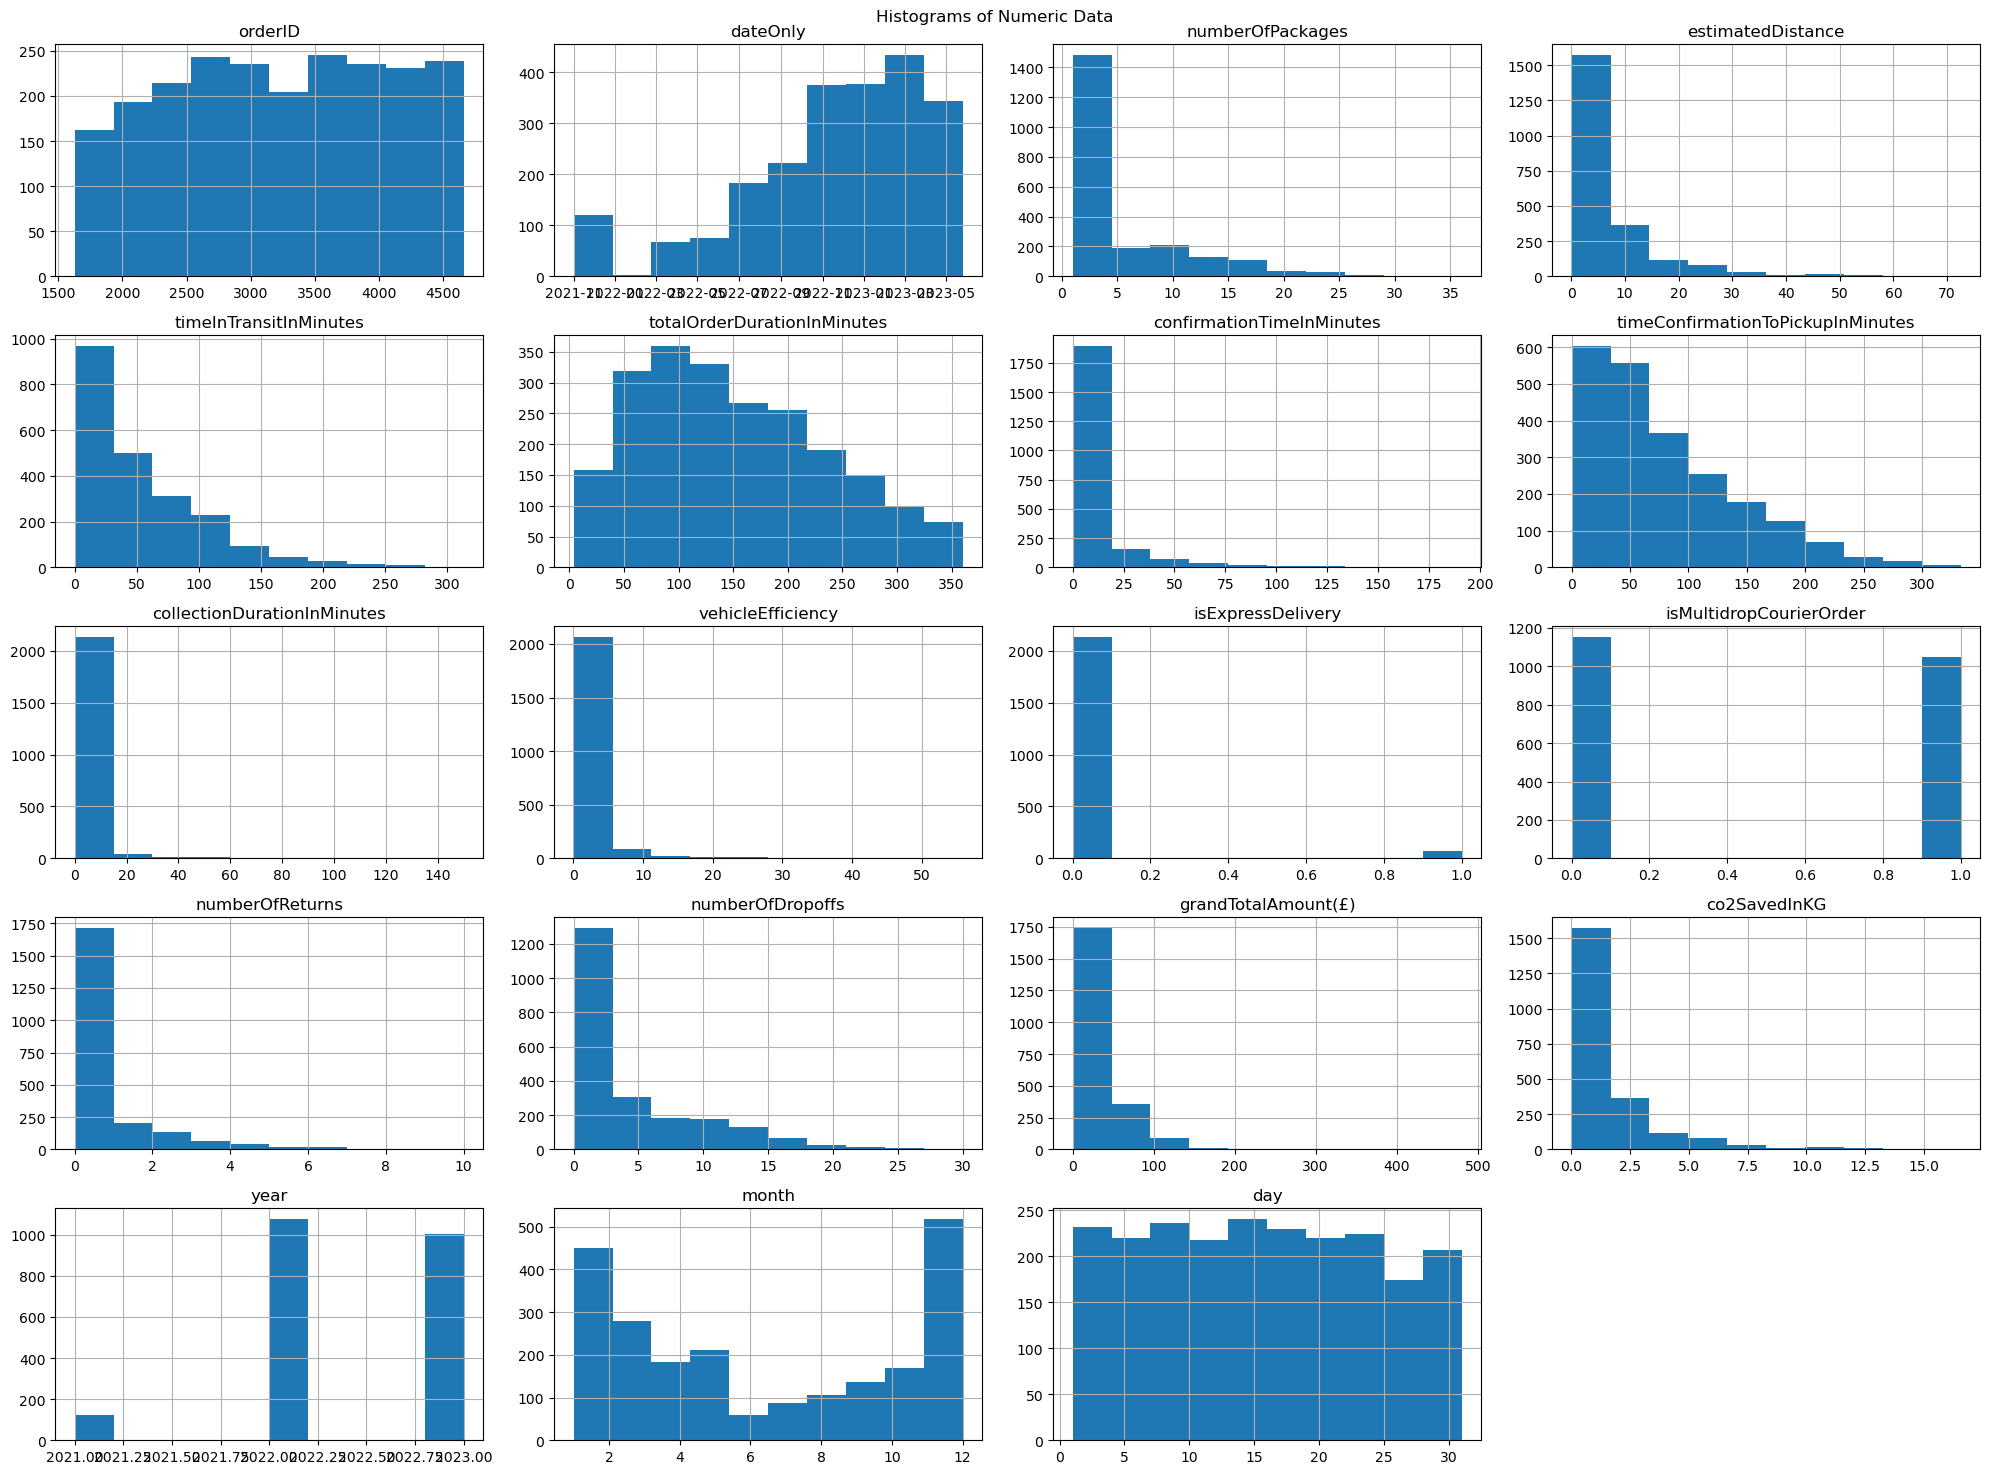

In [11]:
# Plot histograms for each numeric column
df.hist(bins=10, figsize=(20, 15))  # Adjust the number of bins and the figure size as desired

# Set titles and labels
plt.suptitle('Histograms of Numeric Data')
plt.tight_layout()
plt.show()

The skewness analysis calculates the skewness of each numeric variable in the dataset. Skewness measures the asymmetry of the data distribution. A positive skewness indicates that the distribution is skewed to the right, while a negative skewness indicates a skew to the left.
- Skewness values help identify the degree and direction of skewness in each numeric variable.
- It provides insights into the departure of data from a normal distribution, which is essential for understanding the data's characteristics.
- Understanding skewness helps in selecting appropriate data transformation methods to normalize the data if required.

In [12]:
# Calculate skewness for each variable
skewness = df.skew(numeric_only=True)

# Print the skewness of each variable
for column, skew in skewness.items():
    print(f"Skewness of {column}: {skew}")

Skewness of orderID: -0.07544525240518263
Skewness of numberOfPackages: 1.6976219627756304
Skewness of estimatedDistance: 2.96271373073346
Skewness of timeInTransitInMinutes: 1.5359091309781032
Skewness of totalOrderDurationInMinutes: 0.45743849620469723
Skewness of confirmationTimeInMinutes: 3.555204202560915
Skewness of timeConfirmationToPickupInMinutes: 1.013229270939871
Skewness of collectionDurationInMinutes: 8.78804018170264
Skewness of vehicleEfficiency: 6.526120626788753
Skewness of isExpressDelivery: 5.298262883677594
Skewness of isMultidropCourierOrder: 0.09193591330176928
Skewness of numberOfReturns: 3.165302841032775
Skewness of numberOfDropoffs: 1.642549360086412
Skewness of grandTotalAmount(£): 2.909287345706663
Skewness of co2SavedInKG: 2.962703770162789
Skewness of year: -0.41127007054336323
Skewness of month: 0.12118709670441204
Skewness of day: 0.08978806431281522


In [13]:
# Calculate skewness for each variable
skewness = df.skew(numeric_only=True)

# Print the names of columns with skewness > 1 or < -1
for column, skew in skewness.items():
    if skew > 1 or skew < -1:
        print(f"Column '{column}' has skewness: {skew}")

Column 'numberOfPackages' has skewness: 1.6976219627756304
Column 'estimatedDistance' has skewness: 2.96271373073346
Column 'timeInTransitInMinutes' has skewness: 1.5359091309781032
Column 'confirmationTimeInMinutes' has skewness: 3.555204202560915
Column 'timeConfirmationToPickupInMinutes' has skewness: 1.013229270939871
Column 'collectionDurationInMinutes' has skewness: 8.78804018170264
Column 'vehicleEfficiency' has skewness: 6.526120626788753
Column 'isExpressDelivery' has skewness: 5.298262883677594
Column 'numberOfReturns' has skewness: 3.165302841032775
Column 'numberOfDropoffs' has skewness: 1.642549360086412
Column 'grandTotalAmount(£)' has skewness: 2.909287345706663
Column 'co2SavedInKG' has skewness: 2.962703770162789


## Correlations<a class="anchor" id="Correlations"></a>

The correlation matrix displays the pairwise correlation coefficients between all numeric variables in the dataset. Each cell represents the correlation coefficient between two variables, where values closer to 1 indicate a strong positive correlation, values closer to -1 indicate a strong negative correlation, and values close to 0 indicate a weak correlation.
- It allows us to explore relationships and potential dependencies between numeric variables.
- Identifying correlations helps to understand which variables are associated with one another, guiding feature selection for predictive modeling.
- High correlations between predictor variables may indicate potential multicollinearity issues that can affect the model's interpretability and stability.

In [14]:
df.columns

Index(['orderID', 'businessType', 'dateOnly', 'timeOnly',
       'business_vs_Customer', 'numberOfPackages', 'estimatedDistance',
       'timeInTransitInMinutes', 'totalOrderDurationInMinutes',
       'confirmationTimeInMinutes', 'timeConfirmationToPickupInMinutes',
       'collectionDurationInMinutes', 'vehicleEfficiency', 'isExpressDelivery',
       'isMultidropCourierOrder', 'numberOfReturns', 'numberOfDropoffs',
       'grandTotalAmount(£)', 'co2SavedInKG', 'volume_category', 'Region',
       'year', 'month', 'day', 'timeOfDay', 'Season', 'YearMonth',
       'distance_bins'],
      dtype='object')

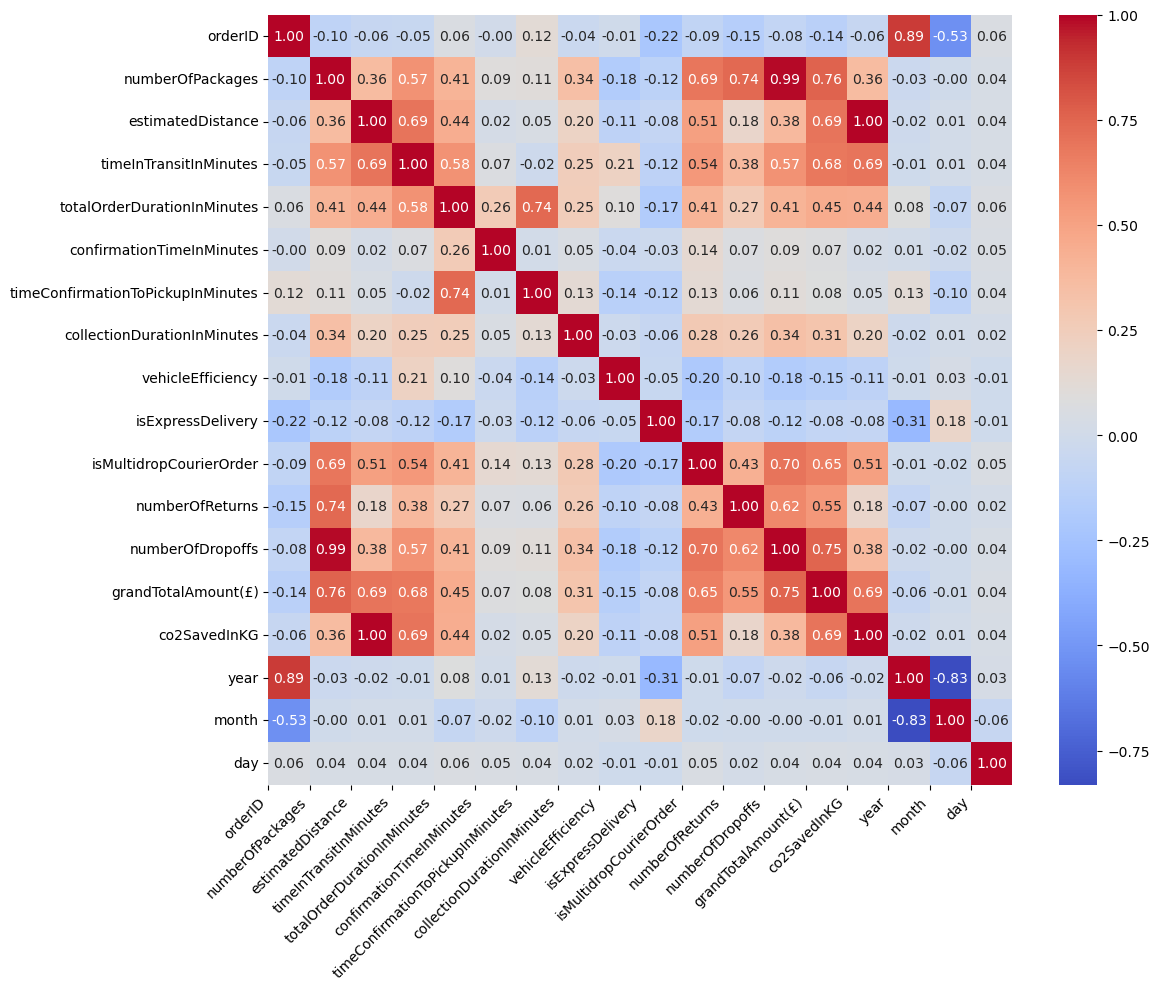

In [15]:
# Calculate and display correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Rotating x-axis labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')

plt.show()

# 4. Target Variable and Relationship Analysis<a class="anchor" id="Target_and_Relationship"></a>

## Target Variable Distribution<a class="anchor" id="Target"></a>

It is vital to investigate the dependent variable, including its distribution, to gain insights into the nature of the variable. The histogram and bin with the highest frequency represent the distribution of the target variable "totalOrderDurationInMinutes." The target variable's distribution provides insights into the typical duration of delivery orders and any potential outliers or extreme values.
- Understanding the distribution of the target variable is essential for setting appropriate model evaluation metrics.
- It helps identify any data imbalances and guides the selection of appropriate modeling techniques, such as regression or classification.
- Analyzing the target variable distribution can reveal patterns that may affect the model's performance and guide preprocessing decisions.

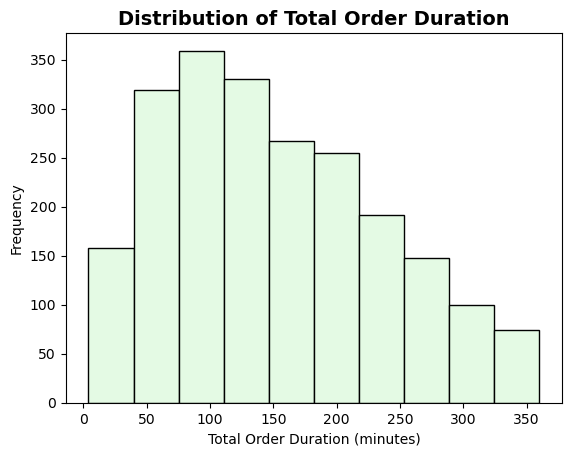

Bin with highest frequency: 75.2 - 110.8
Frequency: 359.0


In [16]:
# Calculate the histogram data
hist, bins, _ = plt.hist(df["totalOrderDurationInMinutes"], bins=10, edgecolor='k', color='#E4FAE4')

# Find the bin with the highest frequency
max_freq_bin = np.argmax(hist)

# Plot the histogram
plt.xlabel("Total Order Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Total Order Duration", fontsize=14, fontweight='bold')
plt.show()

# Round the bin range values to two decimal places
bin_start = round(bins[max_freq_bin], 2)
bin_end = round(bins[max_freq_bin + 1], 2)

# Find the frequency in the bin with the highest frequency
frequency = hist[max_freq_bin]

# Print the bin with the highest frequency and its frequency
print("Bin with highest frequency:", bin_start, "-", bin_end)
print("Frequency:", frequency)

## Numeric Input Variables and Target Variable Relationship Analysis<a class="anchor" id="Numeric"></a>

Understanding the relationship between the target variable, totalOrderDurationInMinutes, and other variables is crucial for developing accurate predictive models and gaining meaningful insights into their potential impact on order duration. 

The scatter plots and trendlines show the relationship between the numeric input variables (e.g., 'numberOfPackages,' 'numberOfReturns,' 'numberOfDropoffs,' 'timeInTransitInMinutes,' 'confirmationTimeInMinutes,' 'timeConfirmationToPickupInMinutes,' 'collectionDurationInMinutes,' 'vehicleEfficiency,' 'co2SavedInKG,' 'estimatedDistance,' 'grandTotalAmount(£)') and the target variable 'totalOrderDurationInMinutes.'
- It provides insights into potential linear relationships between the numeric input variables and the target variable.
- Understanding these relationships can help in feature engineering, selecting relevant predictors for models, and understanding how these features contribute to the target variable's variation.

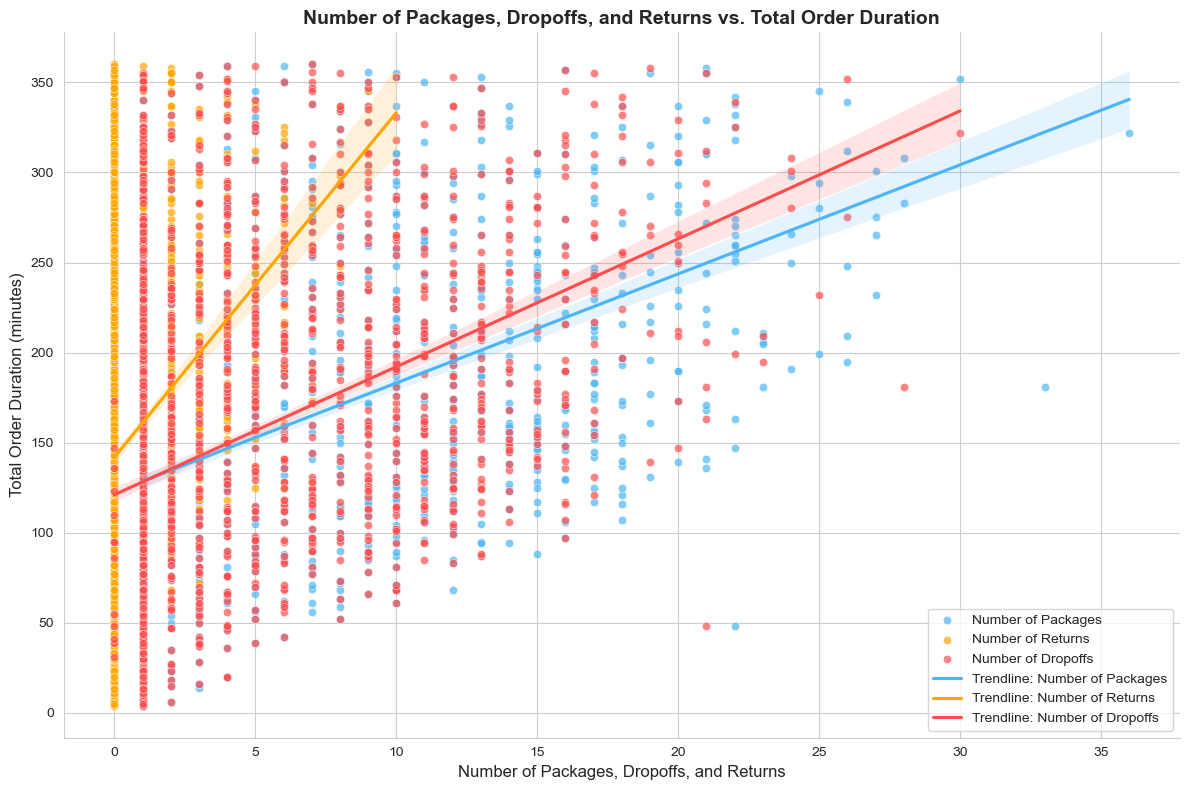

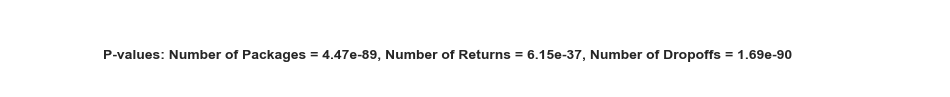

In [17]:
# Set plot style
sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for 'numberOfPackages'
sns.scatterplot(x='numberOfPackages', y='totalOrderDurationInMinutes', data=df, color='#4CB5F5', alpha=0.7, label='Number of Packages')

# Scatter plot for 'numberOfReturns'
sns.scatterplot(x='numberOfReturns', y='totalOrderDurationInMinutes', data=df, color='#FFA500', alpha=0.7, label='Number of Returns')

# Scatter plot for 'numberOfDropoffs'
sns.scatterplot(x='numberOfDropoffs', y='totalOrderDurationInMinutes', data=df, color='#FF4D4D', alpha=0.7, label='Number of Dropoffs')

# Add trendlines
sns.regplot(x='numberOfPackages', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#4CB5F5', label='Trendline: Number of Packages')
sns.regplot(x='numberOfReturns', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#FFA500', label='Trendline: Number of Returns')
sns.regplot(x='numberOfDropoffs', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#FF4D4D', label='Trendline: Number of Dropoffs')

# Set labels and title
plt.xlabel('Number of Packages, Dropoffs, and Returns', fontsize=12)
plt.ylabel('Total Order Duration (minutes)', fontsize=12)
plt.title('Number of Packages, Dropoffs, and Returns vs. Total Order Duration', fontsize=14, fontweight='bold')

# Set legend
plt.legend()

# Set plot aesthetics
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

# Calculate p-values
p_values = []
variables = ['numberOfPackages', 'numberOfReturns', 'numberOfDropoffs']
for variable in variables:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[variable], df['totalOrderDurationInMinutes'])
    p_values.append(p_value)

# Plot p-values as text below the graph
plt.figure(figsize=(12, 1))
plt.text(0.1, 0.4, f'P-values: Number of Packages = {p_values[0]:.2e}, Number of Returns = {p_values[1]:.2e}, Number of Dropoffs = {p_values[2]:.2e}',
         fontsize=10, ha='left', va='center', fontweight = 'bold')

# Remove axes and ticks
plt.axis('off')

# Show the p-values
plt.show()

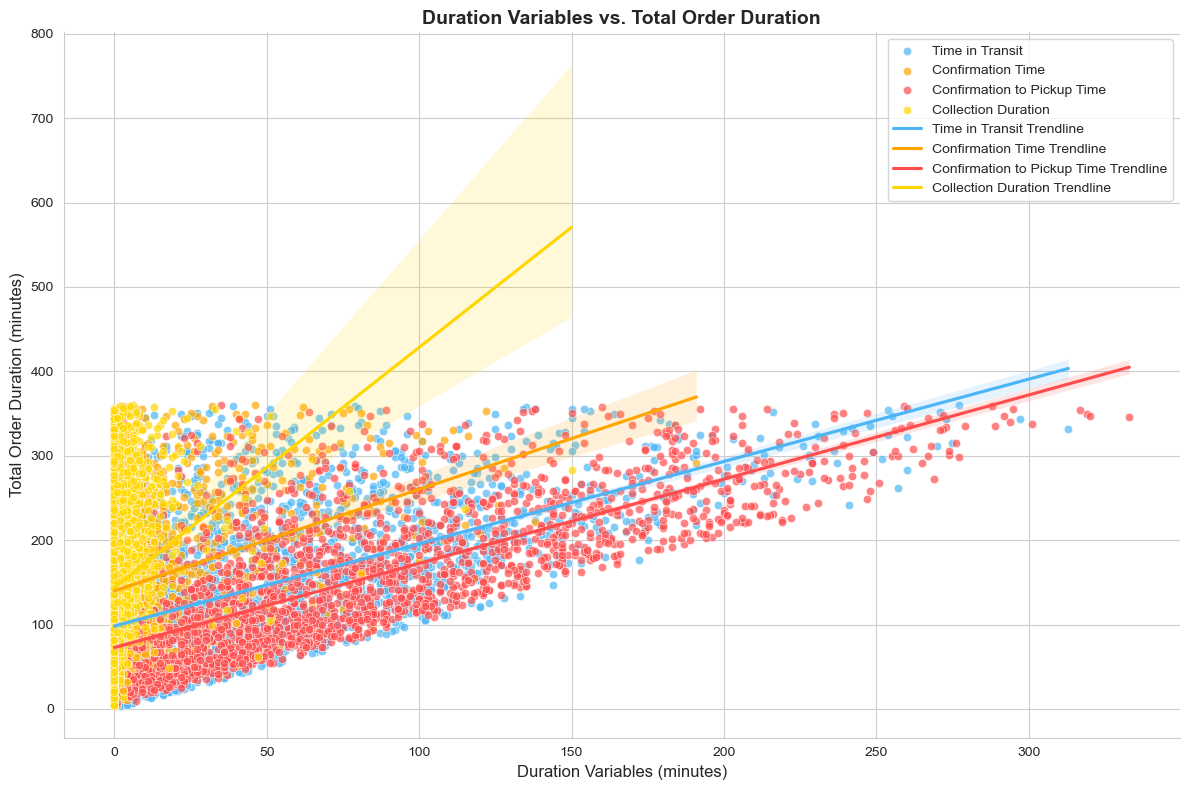

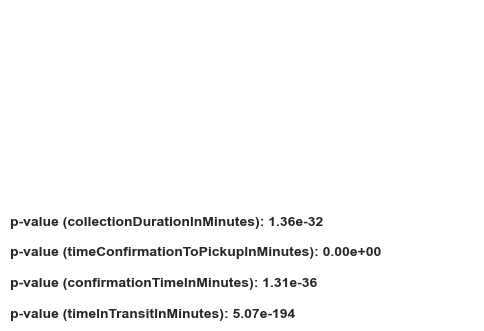

In [18]:
# Set plot style
sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for 'timeInTransitInMinutes'
sns.scatterplot(x='timeInTransitInMinutes', y='totalOrderDurationInMinutes', data=df, color='#4CB5F5', alpha=0.7, label='Time in Transit')

# Scatter plot for 'confirmationTimeInMinutes'
sns.scatterplot(x='confirmationTimeInMinutes', y='totalOrderDurationInMinutes', data=df, color='#FFA500', alpha=0.7, label='Confirmation Time')

# Scatter plot for 'timeConfirmationToPickupInMinutes'
sns.scatterplot(x='timeConfirmationToPickupInMinutes', y='totalOrderDurationInMinutes', data=df, color='#FF4D4D', alpha=0.7, label='Confirmation to Pickup Time')

# Scatter plot for 'collectionDurationInMinutes'
sns.scatterplot(x='collectionDurationInMinutes', y='totalOrderDurationInMinutes', data=df, color='#FFD700', alpha=0.7, label='Collection Duration')

# Add trendlines
sns.regplot(x='timeInTransitInMinutes', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#4CB5F5', label='Time in Transit Trendline')
sns.regplot(x='confirmationTimeInMinutes', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#FFA500', label='Confirmation Time Trendline')
sns.regplot(x='timeConfirmationToPickupInMinutes', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#FF4D4D', label='Confirmation to Pickup Time Trendline')
sns.regplot(x='collectionDurationInMinutes', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#FFD700', label='Collection Duration Trendline')

# Set labels and title
plt.xlabel('Duration Variables (minutes)', fontsize=12)
plt.ylabel('Total Order Duration (minutes)', fontsize=12)
plt.title('Duration Variables vs. Total Order Duration', fontsize=14, fontweight='bold')

# Set legend
plt.legend()

# Set plot aesthetics
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

# Calculate p-values
numeric_vars = ['timeInTransitInMinutes', 'confirmationTimeInMinutes', 'timeConfirmationToPickupInMinutes', 'collectionDurationInMinutes']
p_values = []

for var in numeric_vars:
    r, p = stats.pearsonr(df[var], df['totalOrderDurationInMinutes'])
    p_values.append(p)

# Display p-values
plt.figure(figsize=(6, 4))
for i, var in enumerate(numeric_vars):
    plt.text(0, i*0.1, "p-value ({}): {:.2e}".format(var, p_values[i]), fontsize=10, fontweight='bold')
plt.axis('off')
plt.show()

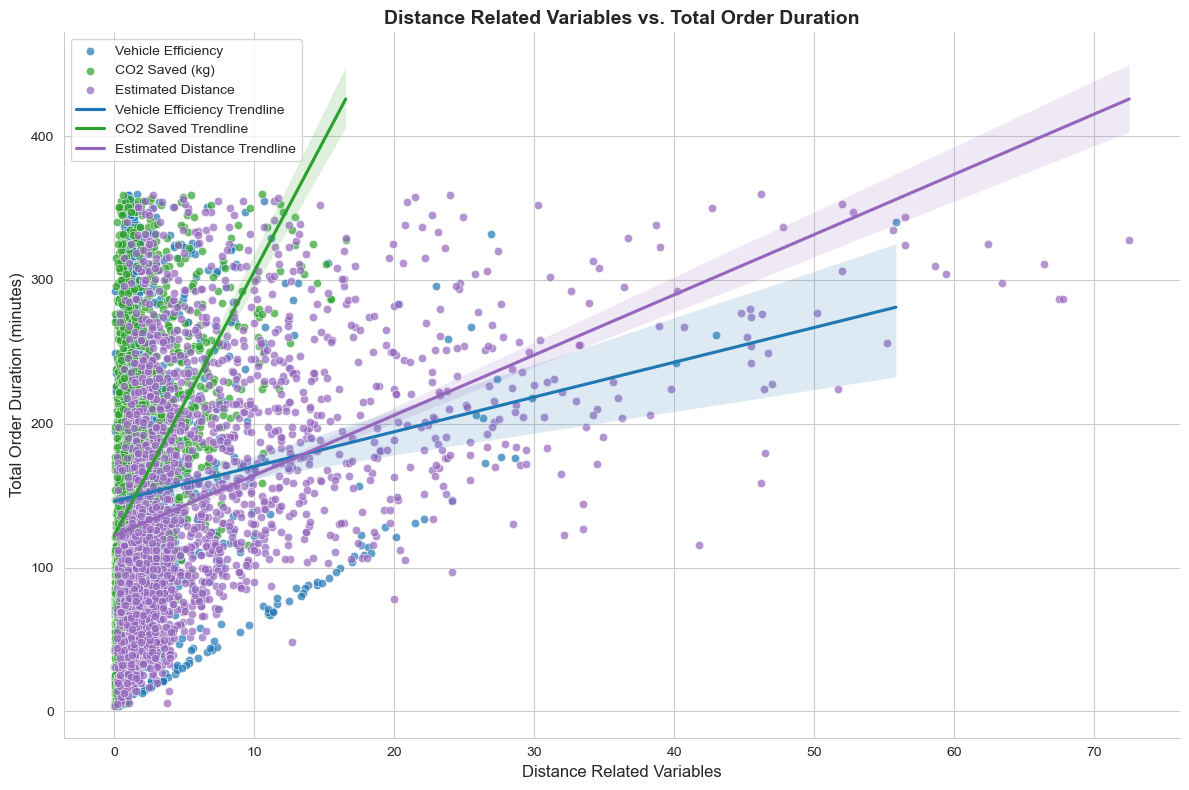

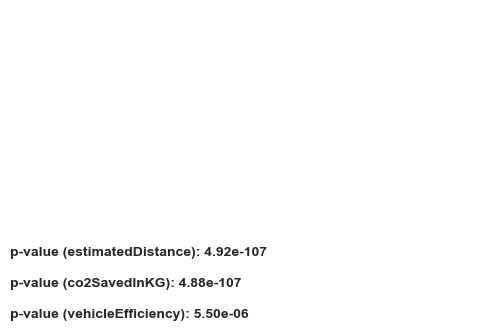

In [19]:
# Set plot style
sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for 'vehicleEfficiency'
sns.scatterplot(x='vehicleEfficiency', y='totalOrderDurationInMinutes', data=df, color='#1f77b4', alpha=0.7, label='Vehicle Efficiency')

# Scatter plot for 'co2SavedInKG'
sns.scatterplot(x='co2SavedInKG', y='totalOrderDurationInMinutes', data=df, color='#2ca02c', alpha=0.7, label='CO2 Saved (kg)')

# Scatter plot for 'estimatedDistance'
sns.scatterplot(x='estimatedDistance', y='totalOrderDurationInMinutes', data=df, color='#9467bd', alpha=0.7, label='Estimated Distance')

# Add trendlines
sns.regplot(x='vehicleEfficiency', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#1f77b4', label='Vehicle Efficiency Trendline')
sns.regplot(x='co2SavedInKG', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#2ca02c', label='CO2 Saved Trendline')
sns.regplot(x='estimatedDistance', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#9467bd', label='Estimated Distance Trendline')

# Set labels and title
plt.xlabel('Distance Related Variables', fontsize=12)
plt.ylabel('Total Order Duration (minutes)', fontsize=12)
plt.title('Distance Related Variables vs. Total Order Duration', fontsize=14, fontweight='bold')

# Set legend
plt.legend()

# Set plot aesthetics
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

# Calculate p-values
numeric_vars = ['vehicleEfficiency', 'co2SavedInKG', 'estimatedDistance']
p_values = []

for var in numeric_vars:
    r, p = stats.pearsonr(df[var], df['totalOrderDurationInMinutes'])
    p_values.append(p)

# Display p-values
plt.figure(figsize=(6, 4))
for i, var in enumerate(numeric_vars):
    plt.text(0, i*0.1, "p-value ({}): {:.2e}".format(var, p_values[i]), fontsize=10, fontweight='bold')
plt.axis('off')
plt.show()


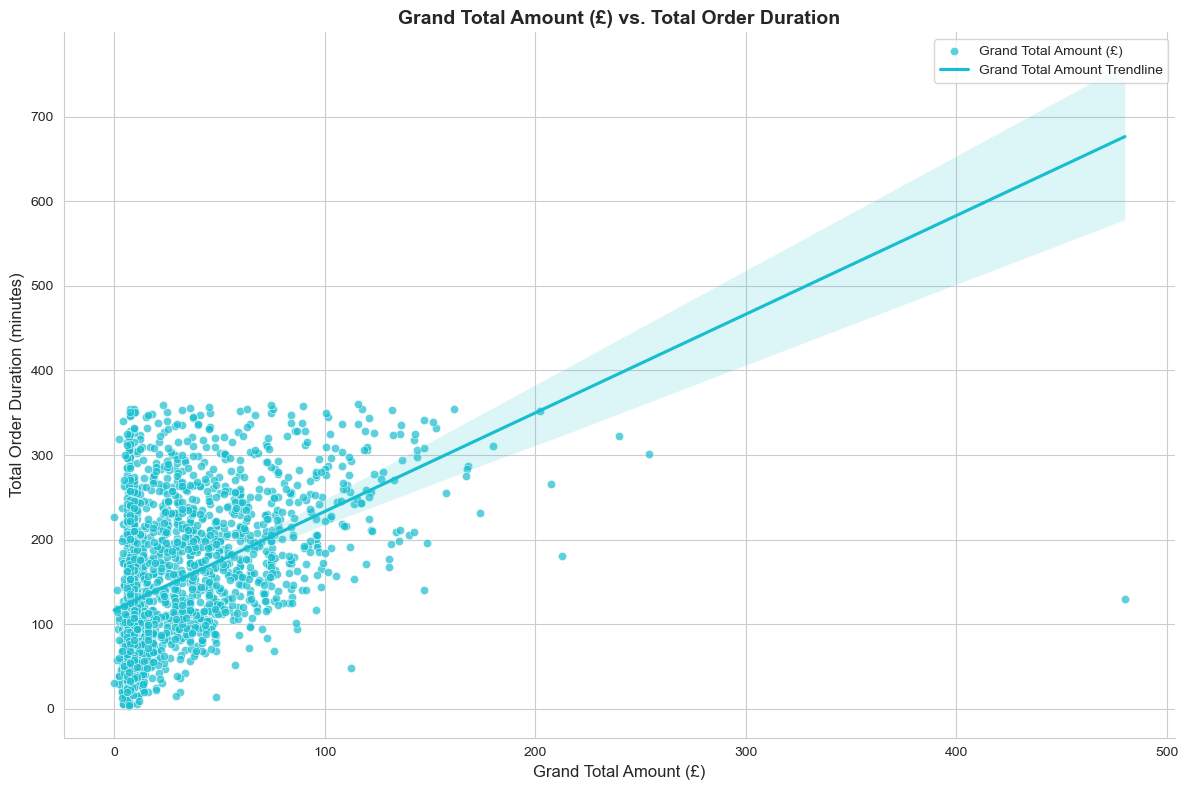

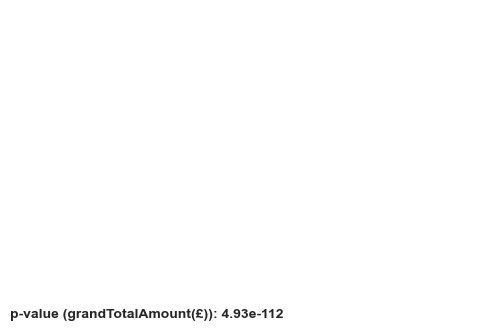

In [20]:
# Set plot style
sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for 'grandTotalAmount(£)'
sns.scatterplot(x='grandTotalAmount(£)', y='totalOrderDurationInMinutes', data=df, color='#17becf', alpha=0.7, label='Grand Total Amount (£)')

# Add trendline
sns.regplot(x='grandTotalAmount(£)', y='totalOrderDurationInMinutes', data=df, scatter=False, color='#17becf', label='Grand Total Amount Trendline')

# Set labels and title
plt.xlabel('Grand Total Amount (£)', fontsize=12)
plt.ylabel('Total Order Duration (minutes)', fontsize=12)
plt.title('Grand Total Amount (£) vs. Total Order Duration', fontsize=14, fontweight='bold')

# Set legend
plt.legend()

# Set plot aesthetics
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

# Calculate p-values
numeric_vars = ['grandTotalAmount(£)']
p_values = []

for var in numeric_vars:
    r, p = stats.pearsonr(df[var], df['totalOrderDurationInMinutes'])
    p_values.append(p)

# Display p-values
plt.figure(figsize=(6, 4))
for i, var in enumerate(numeric_vars):
    plt.text(0, i*0.2, "p-value ({}): {:.2e}".format(var, p_values[i]), fontsize=10, fontweight='bold')
plt.axis('off')
plt.show()


## Categorical Input Variables and Target Variable Relationship Analysis<a class="anchor" id="Categorical"></a>

The boxplots display the distribution of the target variable 'totalOrderDurationInMinutes' for different categories within each categorical input variable (e.g., 'business_vs_Customer,' 'businessType,' 'isExpressDelivery,' 'isMultidropCourierOrder,' 'volume_category,' 'Region,' 'timeOfDay,' 'Season').
- It helps understand how the target variable varies among different categories within each categorical input variable.
- Identifying differences in target variable distribution across categories can help uncover potential insights and patterns in the data.
- This analysis can guide feature engineering, including creating binary/dummy variables for certain categories, or aggregating categories to reduce dimensionality and improve model performance.

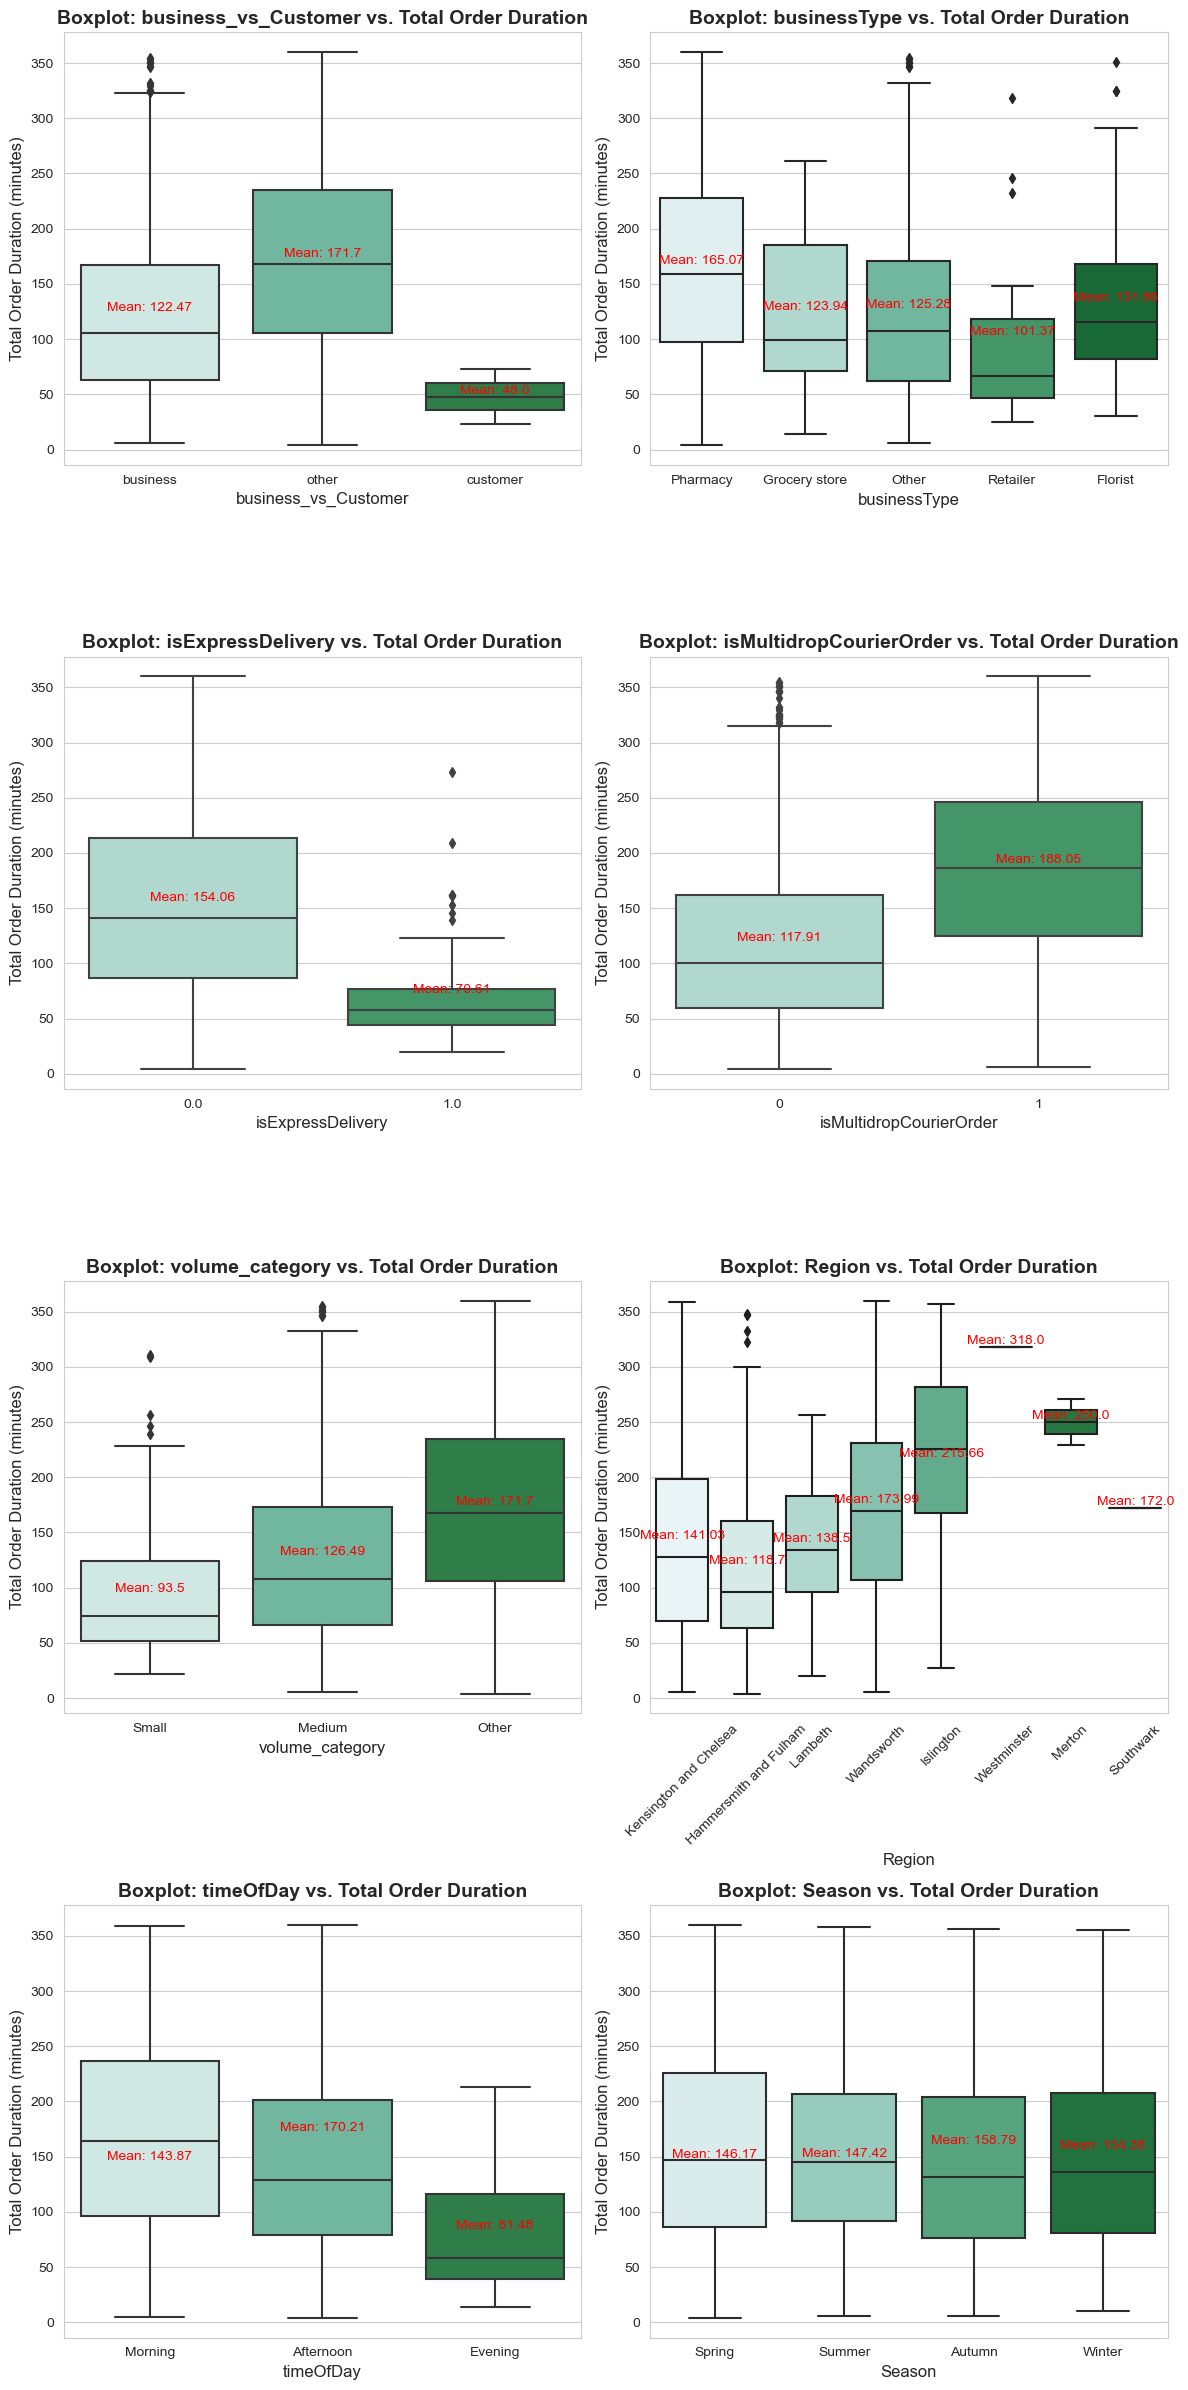

In [21]:
# Set color palette
sns.set_palette("BuGn")

# Define the desired order of categories
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
time_of_day_order = ['Morning', 'Afternoon', 'Evening']

# Categorical variables vs. totalOrderDurationInMinutes
categorical_vars = ['business_vs_Customer', 'businessType', 'isExpressDelivery', 
                    'isMultidropCourierOrder', 'volume_category', 'Region', 'timeOfDay', 'Season']

# Create subplots for categorical variables
fig, axes = plt.subplots(nrows=len(categorical_vars) // 2, ncols=2, figsize=(12, 6 * len(categorical_vars) // 2))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create boxplots for categorical variables
for i, var in enumerate(categorical_vars):
    if var == 'Region':
        axes[i].tick_params(axis='x', rotation=45)
    
    # Specify the order of categories
    if var == 'Season':
        sns.boxplot(x=var, y='totalOrderDurationInMinutes', data=df, palette='BuGn', order=season_order, ax=axes[i])
    elif var == 'timeOfDay':
        sns.boxplot(x=var, y='totalOrderDurationInMinutes', data=df, palette='BuGn', order=time_of_day_order, ax=axes[i])
    else:
        sns.boxplot(x=var, y='totalOrderDurationInMinutes', data=df, palette='BuGn', ax=axes[i])
    
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Total Order Duration (minutes)', fontsize=12)
    axes[i].set_title(f'Boxplot: {var} vs. Total Order Duration', fontsize=14, fontweight='bold')

    # Add mean values to the plot
    means = df.groupby(var)['totalOrderDurationInMinutes'].mean()
    for j, category in enumerate(df[var].unique()):
        mean_value = round(means[category], 2)
        axes[i].text(j, mean_value, f'Mean: {mean_value}', ha='center', va='bottom', color='red')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Processing Times<a class="anchor" id="Processing"></a>

Let's investigate processing times a bit further.

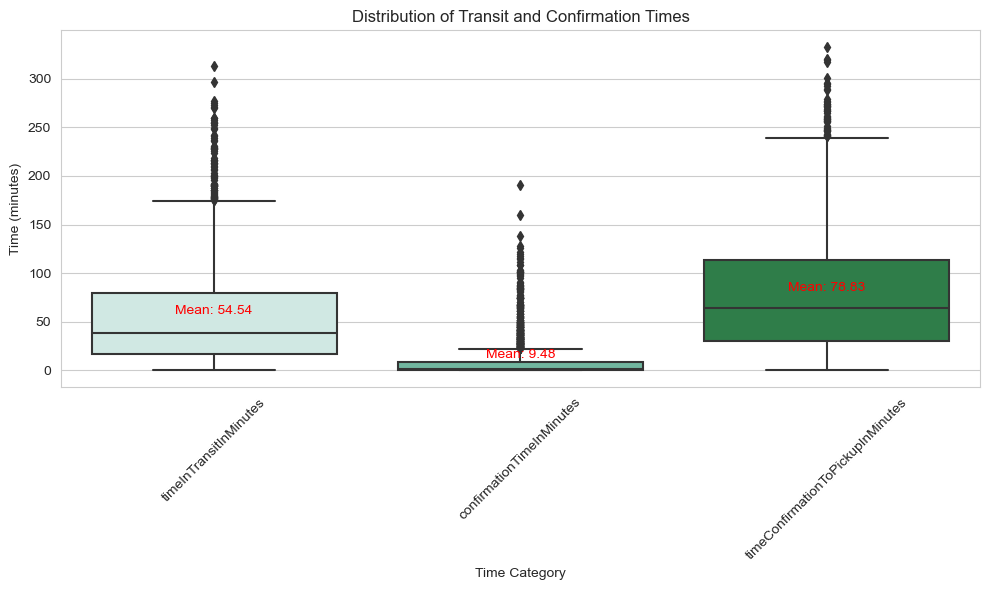

In [22]:
# Filter the DataFrame to include only relevant columns
df_filtered = df[['timeInTransitInMinutes', 'confirmationTimeInMinutes', 'timeConfirmationToPickupInMinutes']]

# Plotting a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, palette='BuGn')

# Add mean values to the plot
means = df_filtered.mean()
for i, mean_value in enumerate(means):
    plt.text(i, mean_value, f'Mean: {mean_value:.2f}', ha='center', va='bottom', color='red')

plt.title('Distribution of Transit and Confirmation Times')
plt.xlabel('Time Category')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

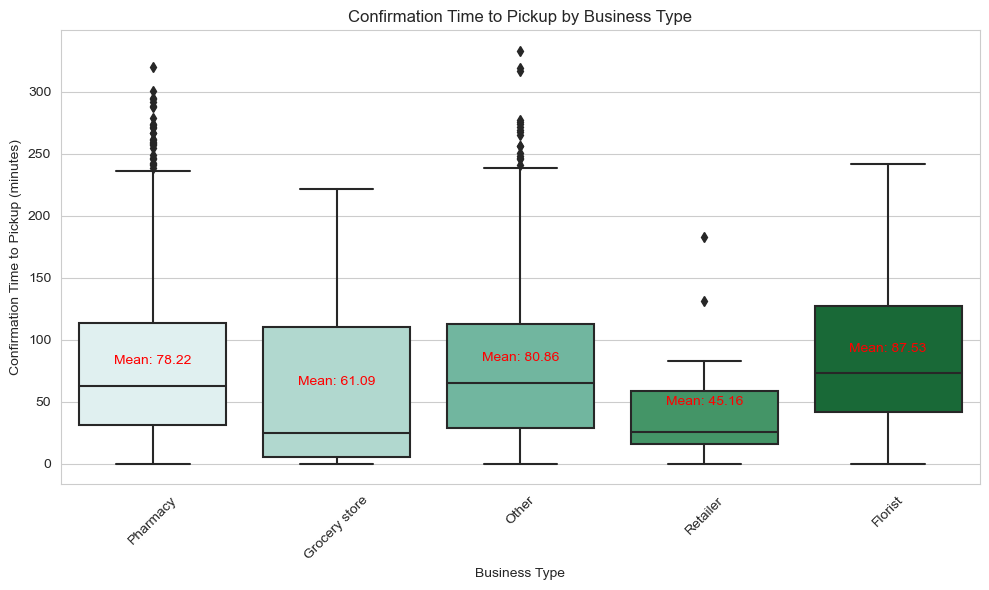

In [23]:
# Filter the DataFrame to include only relevant columns
df_filtered = df[['businessType', 'timeConfirmationToPickupInMinutes']]

# Plotting a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='businessType', y='timeConfirmationToPickupInMinutes', palette='BuGn')

# Add mean values to the plot
means = df_filtered.groupby('businessType')['timeConfirmationToPickupInMinutes'].mean()
for i, business_type in enumerate(df_filtered['businessType'].unique()):
    mean_value = round(means[business_type], 2)
    plt.text(i, mean_value, f'Mean: {mean_value}', ha='center', va='bottom', color='red')

plt.title('Confirmation Time to Pickup by Business Type')
plt.xlabel('Business Type')
plt.ylabel('Confirmation Time to Pickup (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()